In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [0]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/Project/Dataset_images/Train/",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/Project/Dataset_images/Valid/", target_size=(224,224))

Found 6853 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))

In [0]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=30,generator=traindata, validation_data= testdata,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10
30/30 [==============================] - 514s 17s/step - loss: 0.9016 - accuracy: 0.5667 - val_loss: 0.5474 - val_accuracy: 0.7316

Epoch 00001: val_accuracy improved from -inf to 0.73158, saving model to vgg16_2.h5
Epoch 2/10
30/30 [==============================] - 469s 16s/step - loss: 0.5712 - accuracy: 0.7292 - val_loss: 0.6271 - val_accuracy: 0.7000

Epoch 00002: val_accuracy did not improve from 0.73158
Epoch 3/10
30/30 [==============================] - 502s 17s/step - loss: 0.4883 - accuracy: 0.7781 - val_loss: 0.4294 - val_accuracy: 0.7553

Epoch 00003: val_accuracy improved from 0.73158 to 0.75526, saving model to vgg16_2.h5
Epoch 4/10
30/30 [==============================] - 464s 15s/step - loss: 0.3678 - accuracy: 0.8478 - val_loss: 0.1268 - val_accuracy: 0.9105

Epoch 00004: val_accuracy improved from 0.75526 to 0.91053, saving model to vgg16_2.h5
Epoch 5/10
30/30 [==============================] - 462s 15s/step - loss: 0.3040 - accuracy: 0.8865 - val_loss: 0.2

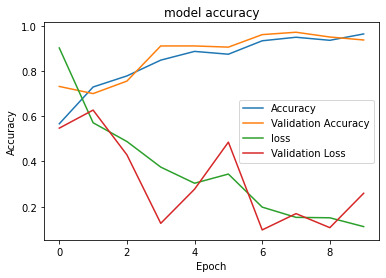

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [0]:
#save model on drive
model.save("/content/drive/My Drive/Project/Models/vgg_2.h5")

# Testing dataset


In [0]:
test_datagen = ImageDataGenerator()
test_data_dir = "/content/drive/My Drive/Project/Test/test/"
print('Total number of images for "testing":')
dataset_test = test_datagen.flow_from_directory(
test_data_dir,
target_size = (224, 224),
batch_size = 10,
class_mode = "categorical",
shuffle=False)

Total number of images for "testing":
Found 256 images belonging to 2 classes.


In [0]:
#Predict accuracy for test set
loss, accuracy = model.evaluate_generator(dataset_test)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.941406  ;  loss = 1.168707 
